In [17]:
##In this Notebook i have created a Ml model to classify whether a student will get placed ot not

In [18]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('/content/placement.csv')

In [20]:
df


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [21]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
df.shape

(100, 4)

In [10]:
#Steps

# 0. Preprocessing the data(missing values, outliers etc) + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test splt
# 4. Train the model
# 5. Evaluate the model/model Selection
# 6. Deploy the model

In [23]:
#Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [15]:
#as we can see form above no missing values in dataset
#I will now delete unwanted coloumns. In this case "Unnamed" Coloumn does't seems of any use so we'll remove it from our dataset

In [24]:
df = df.iloc[:,1:]

In [25]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [26]:
#Preprocessing done
# Now EDA part
#EDA stands for Exploratory Data Analysis. It is an approach to analyzing
#and visualizing data sets to summarize their main characteristics, often
#with the help of statistical graphics and other data visualization methods.

In [27]:
import matplotlib.pyplot as plt

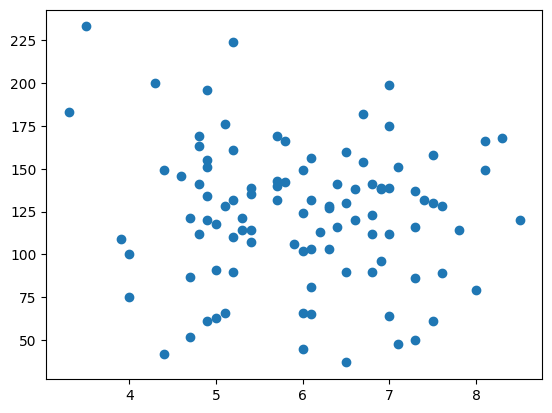

In [28]:
plt.scatter(df['cgpa'],df['iq'])

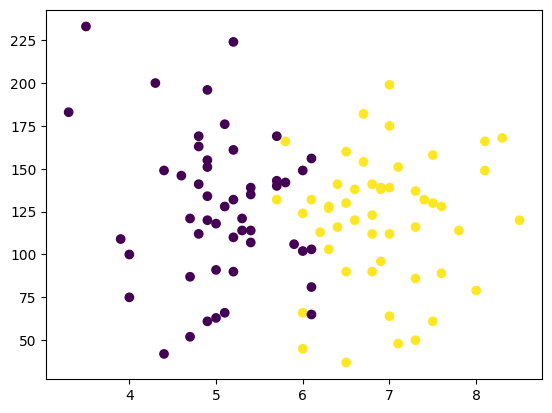

In [31]:
#Now if i want to see how many of the stduent inthe above graph got palced i will add
#slight modification in the scatter plot line
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])      # here "c" means to color code something

In [35]:
#EDA done - From EDA we got an idea that Logistic regressionn algorithm may be good for solving this problem
# Since we need all feature like cgpa iq so here we won't do anything in feature selection
#Now, we'll try to Implement LOGISTIC REGRESSION ALGORITHM as this is a classification problem(Placed,Not placed)


In [36]:
#Extract input and output coloums

In [37]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [38]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [39]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [40]:
#Now We'll first train test split this model, before scaling
#for Train test split we need t import a library sklearn

In [42]:
from sklearn.model_selection import train_test_split

train_test_split(X,y,test_size=0.1)                  ##train_test_split(input cols, output, test data size)

[    cgpa     iq
 98   6.3  103.0
 46   5.3  114.0
 84   5.7  169.0
 43   6.8  141.0
 64   7.0   64.0
 ..   ...    ...
 19   5.2  132.0
 24   4.7  121.0
 95   4.3  200.0
 63   6.3  128.0
 59   4.8  112.0
 
 [90 rows x 2 columns],
     cgpa     iq
 76   4.9  155.0
 72   7.3  116.0
 2    5.3  121.0
 87   5.7  132.0
 16   5.2  224.0
 40   4.9  134.0
 1    5.9  106.0
 82   6.5   37.0
 3    7.4  132.0
 52   7.0  175.0,
 98    1
 46    0
 84    0
 43    1
 64    1
      ..
 19    0
 24    0
 95    0
 63    1
 59    0
 Name: placement, Length: 90, dtype: int64,
 76    0
 72    1
 2     0
 87    1
 16    0
 40    0
 1     0
 82    1
 3     1
 52    1
 Name: placement, dtype: int64]

In [43]:
#Above we get four outputs
# X_training set, x_test set and y_training set , y_test_set RESPECTIVELY


In [44]:
#So we''ll save them in variables

In [51]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.1)

In [62]:
X_train

,cgpa,iq
32,7.0,139.0
61,7.3,137.0
89,4.9,151.0
38,6.5,160.0
52,7.0,175.0
...,...,...
91,7.5,158.0
96,4.4,42.0
86,5.1,128.0
56,6.1,65.0


In [63]:
y_train

32    1
61    1
89    0
38    1
52    1
     ..
91    1
96    0
86    0
56    0
3     1
Name: placement, Length: 90, dtype: int64

In [64]:
X_test

,cgpa,iq
31,3.9,109.0
83,7.5,130.0
88,4.4,149.0
80,4.9,196.0
47,5.2,161.0
26,7.0,199.0
74,6.7,154.0
20,6.6,120.0
22,4.9,120.0
21,7.1,151.0


In [65]:
y_test

31    0
83    1
88    0
80    0
47    0
26    1
74    1
20    1
22    0
21    1
Name: placement, dtype: int64

In [56]:
#Now w'll try to scale the data of X_train

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)

In [71]:
X_train

array([[ 0.8790946 ,  0.4585318 ],
       [ 1.1454869 ,  0.40823581],
       [-0.98565152,  0.76030776],
       [ 0.43510743,  0.98663973],
       [ 0.8790946 ,  1.36385968],
       [ 0.07991769, -0.44679607],
       [-1.25204383,  0.63456778],
       [-0.54166435,  0.35793982],
       [-0.63046178,  0.00586787],
       [ 0.70149973, -0.2204641 ],
       [-0.09767718, -0.37135208],
       [-0.63046178, -0.17016811],
       [ 1.76706895, -1.05034799],
       [ 0.8790946 , -1.42756794],
       [-1.78482843, -1.15093998],
       [-1.07444896, -0.2204641 ],
       [ 1.32308177, -1.50301193],
       [-2.2288156 ,  2.82244348],
       [ 0.34630999, -0.11987212],
       [-0.54166435,  0.4585318 ],
       [-1.51843613,  1.9925596 ],
       [-0.00887974, -0.47194407],
       [ 1.1454869 , -1.77963989],
       [-0.71925922,  2.59611151],
       [ 0.16871513, -0.19531611],
       [-0.00887974,  0.08131186],
       [-0.89685409, -0.06957612],
       [ 1.41187921, -0.79886803],
       [-0.71925922,

In [69]:
X_test = scaler.transform(X_test)

In [70]:
X_test

array([[-1.87362587, -0.29590809],
       [ 1.32308177,  0.23219984],
       [-1.42963869,  0.71001177],
       [-0.98565152,  1.89196761],
       [-0.71925922,  1.01178773],
       [ 0.8790946 ,  1.9674116 ],
       [ 0.6127023 ,  0.83575175],
       [ 0.52390486, -0.01928013],
       [-0.98565152, -0.01928013],
       [ 0.96789204,  0.76030776]])

In [72]:
#Now We'll train the Model

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
clf = LogisticRegression()

In [81]:
#Model Training
clf.fit(X_train,y_train)       #fit funciton is used to train the model where we only pass input and output training dataset as arguments

LogisticRegression()

In [88]:
#Model evaluation
y_pred = clf.predict(X_test)

In [89]:
y_test

31    0
83    1
88    0
80    0
47    0
26    1
74    1
20    1
22    0
21    1
Name: placement, dtype: int64

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,y_pred)

1.0

In [92]:
#LoL we are getting 100% accuracy on our model

In [93]:
#How to plot the decesion boundary

<Axes: >

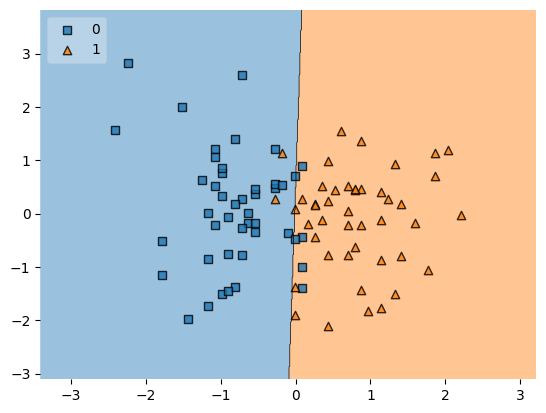

In [95]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train, y=y_train.values, clf=clf, legend=2)

In [96]:
#See above is the visualisation of the decesion boundary made by our trained model
#Hence our Model is ready

In [97]:
#Now our next step is to pick tis model and implement in our application
#To pick this model we use a library called pickle

In [98]:
import pickle

In [99]:
pickle.dump(clf,open('modle.pkl','wb'))